## Final Project Submission


* Student name: Okumu Phelix Oyoo
* Student pace: part time
* Scheduled project review date/time: April 2023
* Instructor name: Diana Mongina (TM)
* Blog post URL:


# Exploration of Different Types of Films and Their Performance at the Box Office Project


## Project Introduction


This is a data exploration project that in overview, looks at various aspects of Box Office films/movies over time, with the aim 
of getting insights and understanding what would inform successes or failures of movies for a Microsoft's new movie studio. It aims to look at various trends and relationships between different aspects of movies such as existing studios, performance, ratings, budget and review as measures of success or failure



## Data Understanding

In this section of the project, we will work with data from 5 different sources from Bof Office. The Selected Datasets to are csv and tsv flies, which will be read using pandas read_csv methods.

The data used are contained in 5 files available from below 4 websites but now grouped under a single folder called zippedData:

1. [Box Office Mojo](https://www.boxofficemojo.com/) - Website containing records of movie titles with respective studio with gross earnings

2. [Rotten Tomatoes](https://www.rottentomatoes.com/) - Website containing records on Movie info and reviews alongside different ratings alongside respective movie IDs

3. [TheMovieDB](https://www.themoviedb.org/) - Website containing records on movie titles with rating voting information among other records

4. [The Numbers](https://www.the-numbers.com/) - Website containing records on movie titles with respective domestic and gross earnings per movie with Movie ID and release dates


## Business Understanding


In order to help Head of Microsoft's Movie Studio understand movie production market, to aid in knowing what movies to produce and things to consider when running a movie studio, this project aims to answer below questions:

1. What are the most popular Movies in the Box Office?


2. What are the most likely strong Competitors Microsoft is likely to face with in the Movie Studio Business?


3. What are the top 10 most profitable movie studios as per the data files given based on;

    a) most profitable movie
    
    b) average profit for the studios across all movies produced

### Requirements

#### 1. Load the Data with Pandas

Creating individual dataframes from all the datasets selected to be used using pandas library alias as pd

#### 2. Perform Data Cleaning Required to Answer First Question

Performing Data Cleaning in all the files selected individually before merging them into a single dataframe then start answering chosen business Questions

In order to answer the questions , the cleaning would focus on:

* Identify and handle missing values
* Identify and handle text data requiring cleaning

#### 3. Perform Data Aggregation and Cleaning Required to answer questions chosen

Merging at least 3 dataframes into a single dataframe to see the relationship between different categorical and numerical columns drawn from at least 3 datasets to get a clear overview of the Box Office Movie Industry records


In [1]:
#Importing different libraries as aliases for purposes of data analysis and exploration

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

%matplotlib inline

### 1. Box Office Mojo

Below cells load bom.movie_gross.csv.gz as bom_df and preview data in the file for better understanding

In [2]:
bom_df = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
bom_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


Getting general information about bom_df dataframe

In [3]:
#to get general info column data types, missing values and general shape of the bom_df dataframe
bom_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


#### BOM Data Cleaning

Below subsequent cells cover data cleaning of the bom_df dataset to make it ready for use in the data analysis (EDA)



Looking at the title column, for consistency puporses it makes sense to have the texts uniformly captured with no special characters and same pattern (either capitalized or lower/upper case)

Below cell is a re-usable function that can be called to clean up the title texts

In [4]:
# Define regular expression pattern to match special characters
pattern = r'[^a-zA-Z0-9\s]'

# Define function to clean text
def clean_text(text):
    text = re.sub(pattern, '', text)  # remove special characters
    text = re.sub(r'\s+', ' ', text)  # remove extra spaces
    text = text.title()  # convert to lowercase
    text = text.strip()  # remove leading and trailing spaces
    return text


In [5]:
# Calling above clean_text function to the bom_df title column
bom_df['title'] = bom_df['title'].apply(clean_text)
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


From above info, the foreign_gross is an object instead of a floating point. In addition, below cell investigates the number of NaN to determine whether to drop the column.

In [6]:
bom_df['studio'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 3387 entries, 0 to 3386
Series name: studio
Non-Null Count  Dtype 
--------------  ----- 
3382 non-null   object
dtypes: object(1)
memory usage: 26.6+ KB


In [7]:
# Checking percentage of NaN in the foreign_gross column
bom_df_percount = (bom_df['foreign_gross'].isna().sum()/len(bom_df['foreign_gross']))*100
bom_df_percount

39.85828166519043

With 39.86% of NaN, we drop above column. The studio column are also not significant for subsequent data analysis hence are dropped too

In [8]:
droppedcol_bom_df = bom_df.drop(['foreign_gross','year','domestic_gross'], axis=1)
droppedcol_bom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   3387 non-null   object
 1   studio  3382 non-null   object
dtypes: object(2)
memory usage: 53.0+ KB


Below investigates NaN in the domestic_gross cell and drops those rows with NaNs

In [9]:
# Dropping NaN rows in the domestic_gross column and creating an new cleaned_bom_df to store the final cleaned data
#cleaned_bom_df = droppedcol_bom_df.dropna(subset=['domestic_gross'])
#cleaned_bom_df

In [10]:
# dropping duplicates based on the title column
cleaned_bom_df = droppedcol_bom_df.drop_duplicates(subset='title')

In [11]:
cleaned_bom_df.value_counts()

title                 studio 
10 Cloverfield Lane   Par.       1
Son Of Sardaar        Eros       1
Slow West             A24        1
Smallfoot             WB         1
Smashed               SPC        1
                                ..
Horses Of God         KL         1
Hostiles              ENTMP      1
Hot Pursuit           WB (NL)    1
Hot Tub Time Machine  MGM        1
Zootopia              BV         1
Length: 3381, dtype: int64

In [12]:
filtered_bom = cleaned_bom_df['title'][cleaned_bom_df.apply(lambda x: x.astype(str).str.contains('Home', case=False)).any(axis=1)]

print(filtered_bom)

280                                       Last Train Home
524                                  Take Me Home Tonight
930                                Jeff Who Lives At Home
1108                                         Take Me Home
1244                                            Homefront
1703                                         The Homesman
1762                     A Girl Walks Home Alone At Night
1890                                            Home 2015
1903                                          Daddys Home
1980                                     Coming Home 2015
2097                                             99 Homes
2353           Miss Peregrines Home For Peculiar Children
2640                                   Spirits Homecoming
2763                                 Spiderman Homecoming
2807                                        Daddys Home 2
2882                                           Home Again
3375    How Victor The Garlic Took Alexey The Stud To ...
Name: title, d

### 2. Rotten Tomatoes 

Below cells load data on Rotten Tomatoes from rt.movie_info.tsv.gz and rt.reviews.tsv.gz for purposes of doing a sneak preview of rotten tomatoes movies info and reviews. We will read both as csv with tab as the delimeter.

In [13]:
#Loading rotten tomatoes to a data frame and storing in rt_movie
rt_movie_info = pd.read_csv('zippedData/rt.movie_info.tsv.gz', sep='\t')
rt_movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [14]:
#Loading rotten tomatoes to a data frame and storing in rt_reviews
rt_reviews_info = pd.read_csv('zippedData/rt.reviews.tsv.gz', sep='\t', encoding='unicode_escape')
rt_reviews_info.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [15]:
rt_movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


#### Rotten Tomattoes Movies Info Data Cleaning

Below cells show various Data cleaning for purposes of subsequent EDA

In [16]:
rt_movie_info = rt_movie_info.drop_duplicates(subset='id')

In [17]:
rt_movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [18]:
rt_movie_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 158.4+ KB


In [19]:
# looking at number of NaN in the studio column to see if it is useful to keep the column or not
rt_movie_info['studio'].isna().sum()

1066


Dropping various columns because of lack of enough data entry and some not being useful for subsequent EDA. This includes the rating column as it does not cover review rating


In [20]:
# Dropping currency, box_office and studio because the NaN is more than 50%. Also dropping
rt_movie_droppedcol = rt_movie_info.drop(['currency','studio','box_office','rating','runtime','synopsis'], axis=1)
rt_movie_droppedcol.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1560 entries, 0 to 1559
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   genre         1552 non-null   object
 2   director      1361 non-null   object
 3   writer        1111 non-null   object
 4   theater_date  1201 non-null   object
 5   dvd_date      1201 non-null   object
dtypes: int64(1), object(5)
memory usage: 85.3+ KB


In [21]:
rt_movie_droppedcol

,id,genre,director,writer,theater_date,dvd_date
0,1,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001"
1,3,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013"
2,5,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000"
3,6,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997"
4,7,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN
...,...,...,...,...,...,...
1555,1996,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007"
1556,1997,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001"
1557,1998,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004"
1558,1999,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002"



Given that 3 of the datasets have date columns, below function is created to be used to convert the date columns into pandas datetime format so that dates are properly intepreted 


In [22]:

def clean_date(df, date_col):
    """Converts a date column from object to datetime format"""
    
    # Convert column to datetime format
    df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
    
    # Return cleaned DataFrame
    return df

In [23]:
# calling the clean_date function to change theater_date and dvd_date columns to datetime format
rt_movie_droppedcol = clean_date(rt_movie_droppedcol,'theater_date')
rt_movie_droppedcol = clean_date(rt_movie_droppedcol,'dvd_date')

In [24]:
rt_movie_droppedcol.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1560 entries, 0 to 1559
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            1560 non-null   int64         
 1   genre         1552 non-null   object        
 2   director      1361 non-null   object        
 3   writer        1111 non-null   object        
 4   theater_date  1201 non-null   datetime64[ns]
 5   dvd_date      1201 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 85.3+ KB



#### Rotten Tomatoes Reviews Data Cleaning

This cleans the 3rd dataset on Rotten Tomatoes reviews 


In [25]:
rt_reviews_info.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [26]:
rt_reviews_info.iloc[0]['review']

"A distinctly gallows take on contemporary financial mores, as one absurdly rich man's limo ride across town for a haircut functions as a state-of-the-nation discourse. "

In [27]:
# doing .info() to get general info about rt_reviews_info
rt_reviews_info.info()
rt_reviews_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [28]:
# Cleaning the date column to datetime format
rt_reviews_info = clean_date(rt_reviews_info,'date')
rt_reviews_info

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,2018-11-10
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,2018-05-23
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,2018-01-04
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,2017-11-16
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,2017-10-12
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,2002-09-24
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,2005-09-21
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,2005-07-17
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,2003-09-07


In [29]:
# dropping a few unwanted columns
rt_reviews_info = rt_reviews_info.drop(['review','rating','critic','publisher','date'], axis=1)

In [30]:
rt_reviews_info['fresh'].describe()

count     54432
unique        2
top       fresh
freq      33035
Name: fresh, dtype: object

In [31]:
rt_reviews_info = rt_reviews_info.drop_duplicates(subset='id')
rt_reviews_info

,id,fresh,top_critic
0,3,fresh,0
163,5,fresh,1
186,6,rotten,0
243,8,fresh,0
318,10,fresh,0
...,...,...,...
54175,1996,fresh,0
54318,1997,rotten,0
54346,1998,fresh,0
54348,1999,fresh,0



### 3. TheMovieDB

In below cells, we explore TheMovieDB in details to understand more about it for purposes of EDA. We start by reading the csv file into a pandas Dataframe called tmdb_movies_df.

We then get more info on this dataset with in order to identify the primary key to use for purposes of later merging it with other dataset dataframes 


In [32]:
#Loading The MovieDB datafile to a data frame and storing in tmdb_movies_df and doing a view of top rows
tmdb_movies_df = pd.read_csv('zippedData/tmdb.movies.csv.gz')
tmdb_movies_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [33]:
# doing .info() to get general info about tmdb_movies_df
tmdb_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB



#### TheMovieDB Data Cleaning

Below cells cover cleaning of this tmdb_movies_df by dropping unnecessary columns and rows, handling missing values, formating texts and row entries into the right data types


In [34]:
# Dropping a few columns deemed unnecessary for data exploration phase
tmdb_coldropped_df = tmdb_movies_df.drop(['genre_ids','id','Unnamed: 0','original_language','original_title','vote_count'], axis=1)
tmdb_coldropped_df

,popularity,release_date,title,vote_average
0,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7
1,28.734,2010-03-26,How to Train Your Dragon,7.7
2,28.515,2010-05-07,Iron Man 2,6.8
3,28.005,1995-11-22,Toy Story,7.9
4,27.920,2010-07-16,Inception,8.3
...,...,...,...,...
26512,0.600,2018-10-13,Laboratory Conditions,0.0
26513,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0
26514,0.600,2018-10-01,The Last One,0.0
26515,0.600,2018-06-22,Trailer Made,0.0


In [35]:
# calling the clean_text function previously defined to clean and format texts in the title column
tmdb_coldropped_df['title'] = tmdb_coldropped_df['title'].apply(clean_text)

# calling the clean_date function prevoiusly defined to clean and format the release_date column
tmdb_coldropped_df = clean_date(tmdb_coldropped_df, 'release_date')

tmdb_coldropped_df

,popularity,release_date,title,vote_average
0,33.533,2010-11-19,Harry Potter And The Deathly Hallows Part 1,7.7
1,28.734,2010-03-26,How To Train Your Dragon,7.7
2,28.515,2010-05-07,Iron Man 2,6.8
3,28.005,1995-11-22,Toy Story,7.9
4,27.920,2010-07-16,Inception,8.3
...,...,...,...,...
26512,0.600,2018-10-13,Laboratory Conditions,0.0
26513,0.600,2018-05-01,Exhibit84Xxx,0.0
26514,0.600,2018-10-01,The Last One,0.0
26515,0.600,2018-06-22,Trailer Made,0.0


In [36]:
tmdb_coldropped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   popularity    26517 non-null  float64       
 1   release_date  26517 non-null  datetime64[ns]
 2   title         26517 non-null  object        
 3   vote_average  26517 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 828.8+ KB


In [37]:
# checking if the multiple entries of specific movies are duplicates and not unique entries
filtered_tmdb = tmdb_coldropped_df['title'][tmdb_coldropped_df.apply(lambda x: x.astype(str).str.contains('Home', case=False)).any(axis=1)]

print(filtered_tmdb)

327            Stomp The Yard 2 Homecoming
412                          Home Makeover
661                        Last Train Home
863                           The Way Home
1089                           Daddys Home
                       ...                
25668                   Foster Home Seance
25937         Lego House Home Of The Brick
26047                     Atomic Homefront
26208    Darci Lynne My Hometown Christmas
26423                            Home Free
Name: title, Length: 127, dtype: object


In [38]:
# dropping duplicate rows based on title column and doing value count to see frequency of unique identifies
cleaned_tmdb_df = tmdb_coldropped_df.drop_duplicates(subset='title')
cleaned_tmdb_df['title'].value_counts()

Harry Potter And The Deathly Hallows Part 1    1
Love Taxes                                     1
Followers                                      1
The Taking Of Ezra Bodine                      1
Andrew Dice Clay Presents The Blue Show        1
                                              ..
Wish You Were Here                             1
We Steal Secrets The Story Of Wikileaks        1
Bastards                                       1
Petes Christmas                                1
The Church                                     1
Name: title, Length: 24631, dtype: int64


### The Movie DB

Next is to read data from TheMovieDB CSV file into a pandas dataframe and conduct various data preview and data cleaning before EDA


In [39]:
#Loading The Number datafile to a data frame and storing in tn_movie_budgets_df and doing a view a few top rows
tn_movie_budgets_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
tn_movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [40]:
# doing .info() to get general info about tn_movie_budgets_df
tn_movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB



#### The Numbers Data Cleaning

Below cells cover cleaning of this tn_movies_budgets_df by dropping unnecessary columns and rows, handling missing values, formating texts and row entries into the right data types


In [41]:
# making the id column be the index column
tn_movie_budgets_df = tn_movie_budgets_df.set_index('id')

In [42]:
"""
calling the clean_text function previously defined to clean 
and format texts in the production_budget, domestic_budget and worldwide_gross columns 
and then convert them to floating points"""

tn_movie_budgets_df['production_budget'] = tn_movie_budgets_df['production_budget'].apply(clean_text).astype(float)
tn_movie_budgets_df['domestic_gross'] = tn_movie_budgets_df['domestic_gross'].apply(clean_text).astype(float)
tn_movie_budgets_df['worldwide_gross'] = tn_movie_budgets_df['worldwide_gross'].apply(clean_text).astype(float)
tn_movie_budgets_df['movie'] = tn_movie_budgets_df['movie'].apply(clean_text)

# dropping the release date column since it this df will be merged later with another df with release_date 
tn_movie_budgets_df = tn_movie_budgets_df.drop(['release_date'], axis=1)

tn_movie_budgets_df

,movie,production_budget,domestic_gross,worldwide_gross
id,,,,
1,Avatar,425000000.0,760507625.0,2.776345e+09
2,Pirates Of The Caribbean On Stranger Tides,410600000.0,241063875.0,1.045664e+09
3,Dark Phoenix,350000000.0,42762350.0,1.497624e+08
4,Avengers Age Of Ultron,330600000.0,459005868.0,1.403014e+09
5,Star Wars Ep Viii The Last Jedi,317000000.0,620181382.0,1.316722e+09
...,...,...,...,...
78,Red 11,7000.0,0.0,0.000000e+00
79,Following,6000.0,48482.0,2.404950e+05
80,Return To The Land Of Wonders,5000.0,1338.0,1.338000e+03


In [43]:
# checking general information about the tn_movie_budget_df to check data type, and existence of non-null counts in the columns
tn_movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie              5782 non-null   object 
 1   production_budget  5782 non-null   float64
 2   domestic_gross     5782 non-null   float64
 3   worldwide_gross    5782 non-null   float64
dtypes: float64(3), object(1)
memory usage: 225.9+ KB


In [44]:
# remaming the movie column to title to match other dataframes for purposes of better future merging
tn_movie_budgets_df = tn_movie_budgets_df.rename(columns={'movie': 'title'})

In [45]:
tn_movie_budgets_df

,title,production_budget,domestic_gross,worldwide_gross
id,,,,
1,Avatar,425000000.0,760507625.0,2.776345e+09
2,Pirates Of The Caribbean On Stranger Tides,410600000.0,241063875.0,1.045664e+09
3,Dark Phoenix,350000000.0,42762350.0,1.497624e+08
4,Avengers Age Of Ultron,330600000.0,459005868.0,1.403014e+09
5,Star Wars Ep Viii The Last Jedi,317000000.0,620181382.0,1.316722e+09
...,...,...,...,...
78,Red 11,7000.0,0.0,0.000000e+00
79,Following,6000.0,48482.0,2.404950e+05
80,Return To The Land Of Wonders,5000.0,1338.0,1.338000e+03



From above value_counts() Method it is evident that there are duplicate entries on same movies. Below cell confirms if those duplicates are genuine duplicates and not different movies


In [46]:
# checking if the multiple entries of specific movies are duplicates and not unique entries
filtered_tn = tn_movie_budgets_df['title'][tn_movie_budgets_df.apply(lambda x: x.astype(str).str.contains('Home', case=False)).any(axis=1)]

print(filtered_tn)

id
99                          Spiderman Homecoming
44                                          Home
30    Miss Peregrines Home For Peculiar Children
37                             Home On The Range
5                                  Daddys Home 2
41                               A Dogs Way Home
88                                   Daddys Home
55                            Sweet Home Alabama
85                   Welcome Home Roscoe Jenkins
32                  Star Trek Iv The Voyage Home
29                                     Homefront
89                 Home Alone 2 Lost In New York
6                          Home For The Holidays
48                          Take Me Home Tonight
70                                  The Homesman
92                                    Home Alone
57                                    Home Again
97                                    Home Fries
56                                          Home
4                       A Prairie Home Companion
65               

In [47]:
# Removing Duplicate entries based on movie column

cleaned_tnmovie_budgets_df = tn_movie_budgets_df.drop_duplicates(subset='title')
cleaned_tnmovie_budgets_df['title'].value_counts()


Avatar                1
Ultramarines          1
Glitter               1
Bright Star           1
Club Dread            1
                     ..
The Age Of Adaline    1
Glory Road            1
John Wick             1
Pokemon 2000          1
My Date With Drew     1
Name: title, Length: 5698, dtype: int64

In [48]:
#doing a .describe to get statistical measures of the columns with numerical values
cleaned_tnmovie_budgets_df.describe()

,production_budget,domestic_gross,worldwide_gross
count,5.698000e+03,5.698000e+03,5.698000e+03
mean,3.181423e+07,4.186763e+07,9.174801e+07
std,4.197735e+07,6.833134e+07,1.754208e+08
min,1.100000e+03,0.000000e+00,0.000000e+00
25%,5.000000e+06,1.418872e+06,4.112890e+06
50%,1.700000e+07,1.719656e+07,2.792412e+07
75%,4.000000e+07,5.234866e+07,9.808585e+07
max,4.250000e+08,9.366622e+08,2.776345e+09



#### Merging of Different Data Frames

Below cells merging of above cleaned the dataframes in order to bring up needed columns for EDA




Merging the Rotten Tomatoes Movie Info and Reviews DataFrames


In [49]:
# merging two dfs from rotten tomatoes files
rt_merged_df = pd.merge(rt_reviews_info, rt_movie_droppedcol, on='id')
rt_merged_df

,id,fresh,top_critic,genre,director,writer,theater_date,dvd_date
0,3,fresh,0,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,2013-01-01
1,5,fresh,1,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,1996-09-13,2000-04-18
2,6,rotten,0,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,1994-12-09,1997-08-27
3,8,fresh,0,Drama|Kids and Family,Jay Russell,Gail Gilchriest,2000-03-03,2000-07-11
4,10,fresh,0,Comedy,Jake Kasdan,Mike White,2002-01-11,2002-06-18
...,...,...,...,...,...,...,...,...
1130,1996,fresh,0,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,2006-08-18,2007-01-02
1131,1997,rotten,0,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,1993-07-23,2001-04-17
1132,1998,fresh,0,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,1962-01-01,2004-05-11
1133,1999,fresh,0,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,1993-04-01,2002-01-29


In [50]:
# doing .info method on the rotten tomatoes data merge
rt_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1135 entries, 0 to 1134
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            1135 non-null   int64         
 1   fresh         1135 non-null   object        
 2   top_critic    1135 non-null   int64         
 3   genre         1133 non-null   object        
 4   director      1014 non-null   object        
 5   writer        891 non-null    object        
 6   theater_date  996 non-null    datetime64[ns]
 7   dvd_date      996 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 79.8+ KB



## Exploratory Data Analysis (EDA)



After looking at all the above cleaned Data from different datasets, below EDA will focus on 3 datasets;
1. The Box Office Mojo
2. The Movie DB
3. The Numbers

The two datasets on Rotten Tomatoes (rotten tomatoes movie info and rotten tomatoes reviews), were ignoted because of lack of specific primary key column that could be used to relate them with the above chosen 3. Otherwise, above 3 have 'title' column as the primary key column to use to call on the .merge method


In [51]:
# doing a merge between Box Office Mojo and The Numbers using 'title' column to consolidate the gross and budget datasets
bomtn_budget_mergeddf = pd.merge(cleaned_bom_df, cleaned_tnmovie_budgets_df, on='title')
bomtn_budget_mergeddf

,title,studio,production_budget,domestic_gross,worldwide_gross
0,Toy Story 3,BV,200000000.0,415004880.0,1.068880e+09
1,Inception,WB,160000000.0,292576195.0,8.355246e+08
2,Shrek Forever After,P/DW,165000000.0,238736787.0,7.562447e+08
3,The Twilight Saga Eclipse,Sum.,68000000.0,300531751.0,7.061028e+08
4,Iron Man 2,Par.,170000000.0,312433331.0,6.211564e+08
...,...,...,...,...,...
1320,Ben Is Back,RAtt.,13000000.0,3703182.0,9.633111e+06
1321,Bilal A New Breed Of Hero,VE,30000000.0,490973.0,6.485990e+05
1322,Mandy,RLJ,6000000.0,1214525.0,1.427656e+06
1323,Lean On Pete,A24,8000000.0,1163056.0,2.455027e+06



Because above bomtn_budget_mergeddf, which is a merge between Box Office Mojo and The Numbers datasets to summarize budgets have a title column, and cleaned_tmdb_df from The MoviesDB, which has the ratings also have title column, It makes sense to merge this with the previously merged bomtn_budget_mergeddf to generate a dataframe with now 3 merged datasets


In [52]:
"""
Merging the 3 datasets from Box Office Mojo,The Numbers and The Movie DB
to add the 'studio','popularity' and 'vote_average' columns
"""
bom_tn_tmdb_mergeddf  = pd.merge(bomtn_budget_mergeddf, cleaned_tmdb_df, on='title')
bom_tn_tmdb_mergeddf

,title,studio,production_budget,domestic_gross,worldwide_gross,popularity,release_date,vote_average
0,Toy Story 3,BV,200000000.0,415004880.0,1.068880e+09,24.445,2010-06-17,7.7
1,Inception,WB,160000000.0,292576195.0,8.355246e+08,27.920,2010-07-16,8.3
2,Shrek Forever After,P/DW,165000000.0,238736787.0,7.562447e+08,15.041,2010-05-16,6.1
3,The Twilight Saga Eclipse,Sum.,68000000.0,300531751.0,7.061028e+08,20.340,2010-06-23,6.0
4,Iron Man 2,Par.,170000000.0,312433331.0,6.211564e+08,28.515,2010-05-07,6.8
...,...,...,...,...,...,...,...,...
1266,Ben Is Back,RAtt.,13000000.0,3703182.0,9.633111e+06,17.273,2018-12-07,6.7
1267,Bilal A New Breed Of Hero,VE,30000000.0,490973.0,6.485990e+05,2.707,2018-02-02,6.8
1268,Mandy,RLJ,6000000.0,1214525.0,1.427656e+06,0.600,2016-01-24,3.5
1269,Lean On Pete,A24,8000000.0,1163056.0,2.455027e+06,9.307,2018-04-06,6.9


In [53]:
#getting general info about the merged dataset
bom_tn_tmdb_mergeddf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1271 entries, 0 to 1270
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   title              1271 non-null   object        
 1   studio             1270 non-null   object        
 2   production_budget  1271 non-null   float64       
 3   domestic_gross     1271 non-null   float64       
 4   worldwide_gross    1271 non-null   float64       
 5   popularity         1271 non-null   float64       
 6   release_date       1271 non-null   datetime64[ns]
 7   vote_average       1271 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 89.4+ KB



In order to get an understanding of which movies make profits and by how much, we need to add a revenue column, which is the difference between worldwide gross and the production_budget. This assumes that worldwide_gross is the gross income from the sale of the movies (a summation of domestic and foreign gross income)


In [54]:

# Adding a 'revenue column' in the merged df as 'worldwide_gross' minus 'production_budget'. Figues in USD

bom_tn_tmdb_mergeddf["revenue"] = bom_tn_tmdb_mergeddf["worldwide_gross"] - bom_tn_tmdb_mergeddf["production_budget"]


In [55]:
bom_tn_tmdb_mergeddf.head()

,title,studio,production_budget,domestic_gross,worldwide_gross,popularity,release_date,vote_average,revenue
0,Toy Story 3,BV,200000000.0,415004880.0,1.068880e+09,24.445,2010-06-17,7.7,868879522.0
1,Inception,WB,160000000.0,292576195.0,8.355246e+08,27.920,2010-07-16,8.3,675524642.0
2,Shrek Forever After,P/DW,165000000.0,238736787.0,7.562447e+08,15.041,2010-05-16,6.1,591244673.0
3,The Twilight Saga Eclipse,Sum.,68000000.0,300531751.0,7.061028e+08,20.340,2010-06-23,6.0,638102828.0
4,Iron Man 2,Par.,170000000.0,312433331.0,6.211564e+08,28.515,2010-05-07,6.8,451156389.0


### Answering Bussiness Understanding Questions Based on EDA


#### 1. The Most Popular Movies in the Box Office

Below cells tend to inquire on the most popular movies based on the merged dataset to answer the 1st Question in the Business Understanding


In [56]:
# group by the 'title' column and get most popular movies
most_popular_movie = bom_tn_tmdb_mergeddf.groupby('title').mean()

# sort the resulting DataFrame in descending order of the maximum values
most_popular_movie_sorted = most_popular_movie.sort_values('popularity', ascending=False)
most_popular_movie_sorted.head(10)

,production_budget,domestic_gross,worldwide_gross,popularity,vote_average,revenue
title,,,,,,
Avengers Infinity War,300000000.0,678815482.0,2.048134e+09,80.773,8.3,1.748134e+09
John Wick,30000000.0,43037835.0,7.623500e+07,78.123,7.2,4.623500e+07
The Hobbit The Battle Of The Five Armies,250000000.0,255119788.0,9.455776e+08,53.783,7.3,6.955776e+08
Guardians Of The Galaxy,170000000.0,333172112.0,7.708675e+08,49.606,7.9,6.008675e+08
Blade Runner 2049,185000000.0,92054159.0,2.593574e+08,48.571,7.4,7.435741e+07
Fantastic Beasts The Crimes Of Grindelwald,200000000.0,159555901.0,6.522201e+08,48.508,6.9,4.522201e+08
Ralph Breaks The Internet,175000000.0,201091711.0,5.242837e+08,48.057,7.2,3.492837e+08
Spiderman Homecoming,175000000.0,334201140.0,8.801664e+08,46.775,7.4,7.051664e+08
Antman And The Wasp,130000000.0,216648740.0,6.231447e+08,44.729,7.0,4.931447e+08


The most Popular Movies in the Box Office are:
1. Avengers Infinity War
2. John Wick
3. The Hobbit The Battle Of The Five Armies
4. Guardians Of The Galaxy
5. Blade Runner 2049
6. Fantastic Beasts The Crimes Of Grindelwald
7. Ralph Breaks The Internet
8. Spiderman Homecoming
9. Antman And The Wasp
10. Avengers Age Of Ultron

#### 2. Microsoft's likely strong competitors

What are the most likely strong Competitors Microsoft is likely to face with in the Movie Studio Business?

Below cells tend to answer business understanding question 2 above


In [57]:
# group by the 'studio' column and get the average ratings of all movies per studio
most_popular_studio = bom_tn_tmdb_mergeddf.groupby('studio').mean()

# sort the resulting DataFrame in descending order of the maximum values
most_popular_studio_sorted = most_popular_studio.sort_values('popularity', ascending=False)
most_popular_studio_sorted

,production_budget,domestic_gross,worldwide_gross,popularity,vote_average,revenue
studio,,,,,,
BV,1.333740e+08,1.807976e+08,4.633946e+08,19.520883,6.690909,3.300206e+08
MGM,4.300000e+07,8.299287e+07,1.397796e+08,18.528500,6.350000,9.677964e+07
LGP,2.000000e+06,3.633600e+04,6.328516e+06,17.867000,5.000000,4.328516e+06
Amazon,2.000000e+07,2.483472e+06,7.034615e+06,16.925000,7.000000,-1.296538e+07
LG/S,5.492333e+07,5.441562e+07,1.440496e+08,15.948800,6.156667,8.912624e+07
...,...,...,...,...,...,...
ELS,7.000000e+06,1.632000e+06,1.933829e+06,1.400000,6.000000,-5.066171e+06
DR,4.000000e+05,4.445200e+04,4.445200e+04,0.600000,6.000000,-3.555480e+05
BBC,6.000000e+05,0.000000e+00,7.943000e+03,0.600000,5.000000,-5.920570e+05


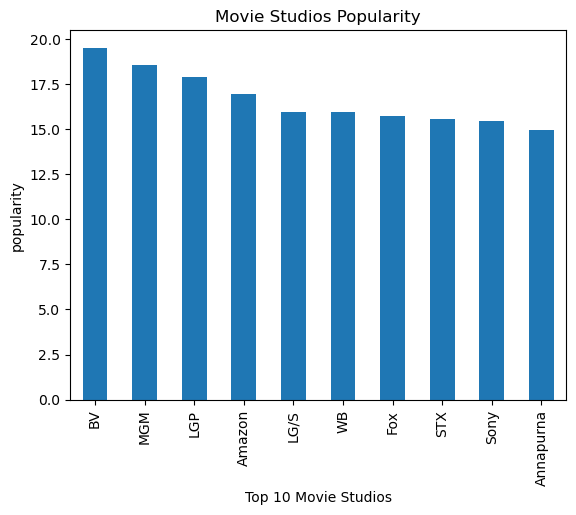

In [58]:
# ploting a bar graph of most popular Movie studios based on movie popularity average per studio
most_popular_studio_sorted['popularity'].head(10).plot(kind='bar')

# Add a title and axis labels
plt.title('Movie Studios Popularity')
plt.xlabel('Top 10 Movie Studios')
plt.ylabel('popularity')

# Display the graph
plt.show()

Based on above analysis, Microsoft's most likely top ten strong competitors are as below. This is based on popularity of top movies produced
1. BV
2. MGM
3. LGP
4. Amazon
5. LG/S
6. WB
7. Fox
8. STX
9. Sony
10. Amapurna

#### 3. The top 10 most profitable movie studios

Below Cells tend to answer the 3rd question on 

What are the top 10 most profitable movie studios as per the data files given based on;

a) most profitable movie

b) average profit for the studios across all movies produced



##### 3(a) 10 most profitable movie studios based on most Profititable Movie 


In [59]:
# group by the 'studio' column and get the maximum value for each group
max_values = bom_tn_tmdb_mergeddf.groupby('studio').max()

# sort the resulting DataFrame in descending order of the maximum values
max_values_sorted = max_values.sort_values('revenue', ascending=False)
max_values_sorted

,title,production_budget,domestic_gross,worldwide_gross,popularity,release_date,vote_average,revenue
studio,,,,,,,,
BV,Zootopia,410600000.0,700059566.0,2.048134e+09,80.773,2018-12-19,8.3,1.748134e+09
Uni.,Your Highness,250000000.0,652270625.0,1.648855e+09,40.095,2018-12-21,8.3,1.433855e+09
WB,Yogi Bear,300000000.0,448139099.0,1.146895e+09,48.571,2018-12-21,8.3,9.868946e+08
P/DW,Transformers Dark Of The Moon,195000000.0,352390543.0,1.123791e+09,28.734,2012-11-21,7.7,9.287905e+08
Sony,Zookeeper,300000000.0,404508916.0,1.110527e+09,46.775,2018-10-12,7.6,9.105270e+08
...,...,...,...,...,...,...,...,...
ATO,Casino Jack,12500000.0,2039869.0,2.272186e+06,9.432,2010-12-17,6.1,-1.022781e+07
Amazon,Suspiria,20000000.0,2483472.0,7.034615e+06,16.925,2018-10-26,7.0,-1.296538e+07
OMNI/FSR,Dylan Dog Dead Of Night,20000000.0,1186538.0,6.093725e+06,7.508,2011-11-01,4.4,-1.390628e+07


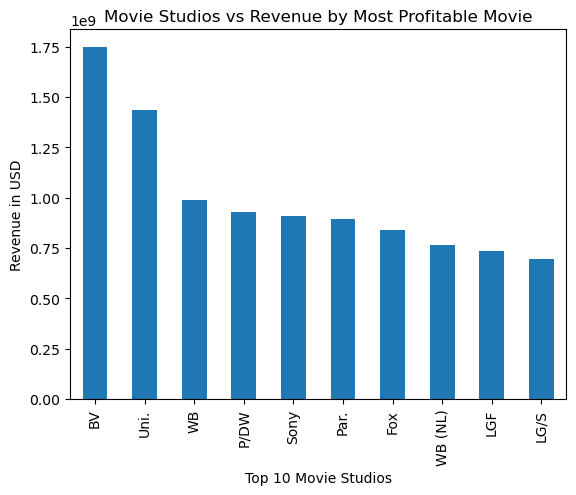

In [60]:
# ploting a bar graph of most profitable production studio (top 10) based on maximum revenue from most profitable movie
max_values_sorted['revenue'].head(10).plot(kind='bar')

# Add a title and axis labels
plt.title('Movie Studios vs Revenue by Most Profitable Movie')
plt.xlabel('Top 10 Movie Studios')
plt.ylabel('Revenue in USD')

# Display the graph
plt.show()




To Answer 3(a) question on top ten most profitable studios based on the most profitable movie. It is evident that BV (Buena Vista which is a brand name that has historically been used for divisions and subsidiaries of The Walt Disney Company) is the most profitable studio based on the most profitable movie 'Zootopia'. Below is the full top 10 list
1. BV
2. Uni
3. WB
4. P/DW
5. Sony
6. Par
7. Fox
8. WB (NL)
9. LGF
10. LG/S




##### 3(b) 10 most profitable movie studios based on Average Profit for all Movies Produced


In [61]:
# group by the 'studio' column and get the mean value for each group
mean_values = bom_tn_tmdb_mergeddf.groupby('studio').mean()

# sort the resulting DataFrame in descending order of the mean values
mean_values_sorted = mean_values.sort_values('revenue', ascending=False)
mean_values_sorted

,production_budget,domestic_gross,worldwide_gross,popularity,vote_average,revenue
studio,,,,,,
P/DW,1.334000e+08,1.682915e+08,5.078028e+08,14.669800,6.520000,3.744028e+08
BV,1.333740e+08,1.807976e+08,4.633946e+08,19.520883,6.690909,3.300206e+08
GrtIndia,3.000000e+07,1.898579e+07,2.635029e+08,10.406000,7.000000,2.335029e+08
Uni.,5.672339e+07,8.960870e+07,2.294550e+08,14.748927,6.158065,1.727316e+08
Fox,7.000603e+07,8.442595e+07,2.399093e+08,15.754319,6.338793,1.699033e+08
...,...,...,...,...,...,...
Amazon,2.000000e+07,2.483472e+06,7.034615e+06,16.925000,7.000000,-1.296538e+07
OMNI/FSR,2.000000e+07,1.186538e+06,6.093725e+06,7.508000,4.400000,-1.390628e+07
CE,3.666667e+07,8.955202e+06,1.919718e+07,10.218000,6.000000,-1.746949e+07


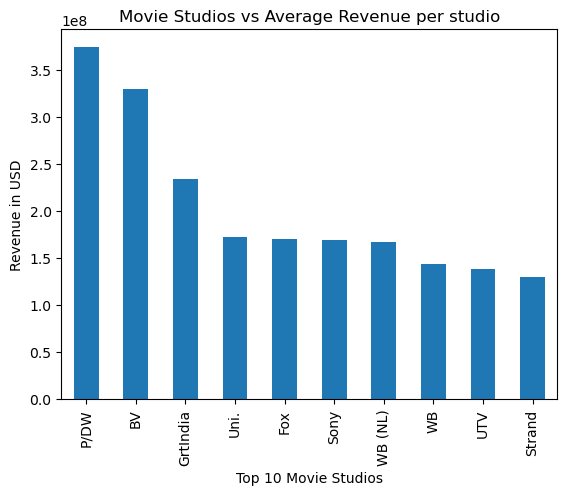

In [62]:
# ploting a bar graph of most profitable production studios (top 10) based on average revenue from all movies produced in that studio
mean_values_sorted['revenue'].head(10).plot(kind='bar')

# Add a title and axis labels
plt.title('Movie Studios vs Average Revenue per studio')
plt.xlabel('Top 10 Movie Studios')
plt.ylabel('Revenue in USD')

# Display the graph
plt.show()




To Answer 3(b) question on top ten most profitable studios based on average revenues. It is evident below are the most profitable movie studio based on average revenues generated on movies produced from top;
1. P/DW
2. BV
3. GrtIndia
4. Uni
5. Fox
6. Sony
7. WB(NL)
8. WB
9. UTV
10. Strand

## Conclusion & Recommendations

Based on above analysis, below are the recommendations for Head of Microsoft Studio:

1. Considering the Top 10 most popular movies based on maximum revenue generation, it is evident that most popular movies do not necessarily translate to top revenue generating. However, popularity scores are critical in knowing market penetration (studio's existence awareness)

2. With this analysis, Head of Microsoft Movie Studio now knows the top 10 most profitable movie studios, which can be considered as major competitors. It is therefore, recommended that Microsoft focus on above mentioned 10 for purposes of competitor analysis (business models,marketing models, and SWOT analysis)

3. In future analysis of Studios performance, focus should be on the average revenue based on movies' financial performances. This is evidently highlighted in the two analyses where ratings based on most revenue generating movies gives a different top 10 studios compared to that from the overall average revenues generated from all the movies from a single studio

4. As far as future analyses are concerned, data collected from Rotten Tomatoes, which better cover ratings and reviews, should include a the movie titles column so as to be efectively have definte way of relating them with other datasets with movie titles. This is one of the surest ways of merging ratings to their respective movies in other datasets. The Rotten Tomatoes, despite having better reviews data, had to be dropped because they both lacked the primary key column that matches the other 3 data sets
